<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/5_Visualizacion/pandas_visualizacion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# Visualización con Pandas

Recorrido por las visualizaciones la libreria [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html).


Empezamos, importamos las librerias a utilizar.

In [1]:
# !pip install wbdata

/Users/mac/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.10) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## World Bank Data API

Vemos el principal funcionamiento de la API.

Recorremos la (fuente?) de datos

In [2]:
wbdata.get_source()  

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  24  Poverty and Equity
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclus

Seleccionamos algunos datos de educacion. [Barro-Lee dataset](http://www.barrolee.com/)

In [3]:
wbdata.get_indicator(source=12)  

id                             name
-----------------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------
BAR.NOED.1519.FE.ZS            Barro-Lee: Percentage of female population age 15-19 with no education
BAR.NOED.1519.ZS               Barro-Lee: Percentage of population age 15-19 with no education
BAR.NOED.15UP.FE.ZS            Barro-Lee: Percentage of female population age 15+ with no education
BAR.NOED.15UP.ZS               Barro-Lee: Percentage of population age 15+ with no education
BAR.NOED.2024.FE.ZS            Barro-Lee: Percentage of female population age 20-24 with no education
BAR.NOED.2024.ZS               Barro-Lee: Percentage of population age 20-24 with no education
BAR.NOED.2529.FE.ZS            Barro-Lee: Percentage of female population age 25-29 with no education
BAR.NOED.2529.ZS               Barro-Lee: Percentage of population age 25-29 wi

## Graficando con Pandas

### Grafico de torta

In [4]:
wbdata.get_indicator(source=14)

id                         name
-------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------------
fin1.t.a.1                 Financial institution account,male(% age 15+)
fin1.t.a.2                 Financial institution account,female(% age 15+)
fin18.t.d.1                Saved any money in the past year, male  (% age 15+)
fin18.t.d.2                Saved any money in the past year, female  (% age 15+)
FP.CPI.TOTL.ZG             Inflation, consumer prices (annual %)
FX.OWN.TOTL.FE.ZS          Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)
FX.OWN.TOTL.MA.ZS          Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)
HD.HCI.AMRT                Survival Rate from Age 15-60
HD.HCI.AMRT.FE             Survival Rate from Age 15-60, Female
HD.HCI.A

In [5]:
indicadores = {'HD.HCI.LAYS.FE':'educacion_femenina','HD.HCI.LAYS.MA':'educacion_masculina'}

data = wbdata.get_dataframe(indicadores, country=['USA','ARG'])

df = pd.DataFrame(data=data)

In [6]:
df.head()

,educacion_femenina,educacion_masculina
country,,
Argentina,8.97,8.77
United States,11.19,11.09


Hacemos un gráfico de tortas para comparar la educación por género entre Argentina y Estado Unidos de manera relativa.

Text(0.5, 1.0, 'Educación masculina USA vs ARG')

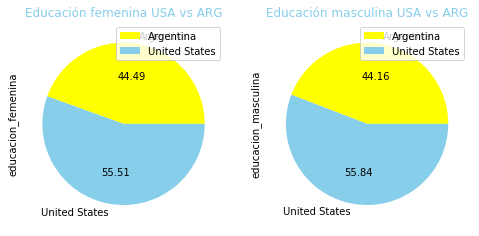

In [7]:
ax1, ax2 = df.plot.pie(subplots=True,figsize=(8,4), colors=['yellow', 'skyblue'],
                      autopct='%.2f')

ax1.set_title('Educación femenina USA vs ARG', color='skyblue')
ax2.set_title('Educación masculina USA vs ARG', color='skyblue')

### Serie de tiempo

Vemos la educacion en la poblacion a lo largo de los años 

In [8]:
date_time = datetime.datetime(1950,1,1), datetime.datetime(2010,1,1)


# Porcentaje de no educacion en la población
indicadores = {'BAR.NOED.1519.ZS':'15-19','BAR.NOED.2024.ZS':'20-24', 
              'BAR.NOED.2529.ZS':'25-29', 'BAR.NOED.3034.ZS':'30-34',
              'BAR.NOED.3539.ZS':'35-39' , 'BAR.NOED.4044.ZS':'40-44',
              'BAR.NOED.4549.ZS':'45-49', 'BAR.NOED.5054.ZS':'50-54',
              'BAR.NOED.5559.ZS':'55-59'}

data = wbdata.get_dataframe(indicadores, country = 'ARG', data_date = date_time)
df = pd.DataFrame(data=data)

In [9]:
print('Valores nulos:',sum(df.isna().sum()))

Valores nulos: 288


El dataset contiene va desde el año 1950 a 2010 y con ddatos cada cinco años. Como vamos a enfocarnos en la visualizacion dejamos los datos nulos de lado. 

In [10]:
df.dropna(inplace=True)
df

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
2010,0.30,0.25,0.25,0.80,0.29,0.72,0.72,1.20,1.20
2005,0.30,0.25,0.80,0.29,0.72,0.72,1.20,1.20,2.44
2000,0.83,1.30,1.62,2.05,2.74,2.74,4.09,4.09,5.49
1995,0.98,1.62,1.91,3.43,3.43,3.82,3.82,5.17,5.17
1990,1.60,1.80,4.00,4.00,3.60,3.60,4.90,4.90,6.50
1985,1.36,4.00,2.84,3.43,3.43,4.63,4.63,5.89,5.89
1980,1.30,1.90,3.30,3.30,4.40,4.40,5.40,5.40,6.80
1975,2.08,3.30,3.19,4.18,4.18,5.40,5.40,7.30,7.30
1970,2.70,3.10,4.00,4.00,5.40,5.40,7.70,7.70,11.90


Breve resumen descriptivo

In [11]:
df.describe()

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1.272222,1.946667,2.434444,2.831111,3.132222,3.492222,4.206667,4.761111,5.854444
std,0.788856,1.307851,1.358677,1.444043,1.669392,1.783716,2.152655,2.312074,3.038791
min,0.300000,0.250000,0.250000,0.290000,0.290000,0.720000,0.720000,1.200000,1.200000
25%,0.830000,1.300000,1.620000,2.050000,2.740000,2.740000,3.820000,4.090000,5.170000
50%,1.300000,1.800000,2.840000,3.430000,3.430000,3.820000,4.630000,5.170000,5.890000
75%,1.600000,3.100000,3.300000,4.000000,4.180000,4.630000,5.400000,5.890000,6.800000
max,2.700000,4.000000,4.000000,4.180000,5.400000,5.400000,7.700000,7.700000,11.900000


Graficamos el porcentaje de la poblacion no educado de toda la población para distintas categorías de edades.

([<matplotlib.axis.XTick at 0x11aec1b00>,
 <a list of 9 Text xticklabel objects>)

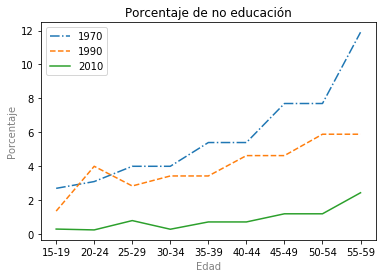

In [14]:
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df.iloc[5,].plot(style = ('--'), label = '1990', legend = True)
df.iloc[1,].plot(style = '-', label = '2010', legend = True)
plt.title('Porcentaje de no educación')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

Esta vez lo hacemos sólo para la población femenina.

In [15]:
date_time = datetime.datetime(1950,1,1), datetime.datetime(2010,1,1)

# Porcentaje de mujeres sin educacion por rango etario
indicadores = {'BAR.NOED.1519.FE.ZS':'15-19','BAR.NOED.2024.FE.ZS':'20-24', 
              'BAR.NOED.2529.FE.ZS':'25-29', 'BAR.NOED.3034.FE.ZS':'30-34',
              'BAR.NOED.3539.FE.ZS':'35-39' , 'BAR.NOED.4044.FE.ZS':'40-44',
              'BAR.NOED.4549.FE.ZS':'45-49', 'BAR.NOED.5054.FE.ZS':'50-54',
              'BAR.NOED.5559.FE.ZS':'55-59'}

df1 = wbdata.get_dataframe(indicadores, country = 'ARG', data_date=date_time)
df1.dropna(inplace = True)

Porcentaje no educado de la población femenina.

([<matplotlib.axis.XTick at 0x11af3d2b0>,
 <a list of 9 Text xticklabel objects>)

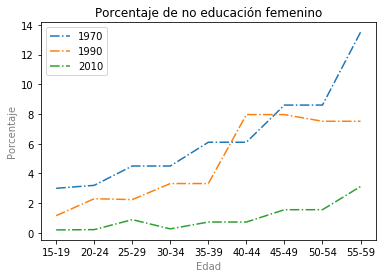

In [16]:
df1.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[5,].plot(style = '-.', label = '1990', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010', legend = True)
plt.title('Porcentaje de no educación femenino')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

Ahora comparamos la educacion de la población total vs población femenina en los años 1970 y 2010. 

([<matplotlib.axis.XTick at 0x11b02a588>,
 <a list of 9 Text xticklabel objects>)

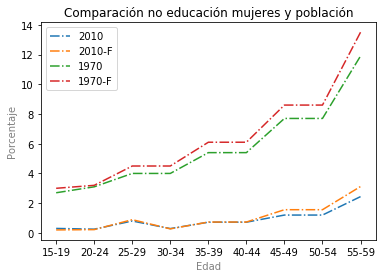

In [17]:
# 2010
df.iloc[1,].plot(style = '-.', label = '2010', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010-F', legend = True) 
# 1970
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[8,].plot(style = '-.', label = '1970-F', legend=True)
plt.title('Comparación no educación mujeres y población')
plt.xlabel('Edad', color = 'grey')
plt.ylabel('Porcentaje', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

Vemos que luego de 40 años la brecha se acoto.

## Gráfico de barras


In [18]:
df.head(5)

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
2010,0.30,0.25,0.25,0.80,0.29,0.72,0.72,1.20,1.20
2005,0.30,0.25,0.80,0.29,0.72,0.72,1.20,1.20,2.44
2000,0.83,1.30,1.62,2.05,2.74,2.74,4.09,4.09,5.49
1995,0.98,1.62,1.91,3.43,3.43,3.82,3.82,5.17,5.17
1990,1.60,1.80,4.00,4.00,3.60,3.60,4.90,4.90,6.50


Text(0, 0.5, 'Porcentaje')

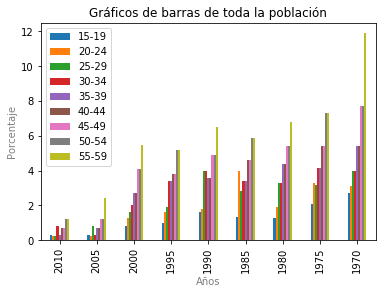

In [19]:
ax = df.plot(kind='bar',
       title='Gráficos de barras de toda la población')
ax.set_xlabel('Años',color='grey')
ax.set_ylabel('Porcentaje',color='grey')

Lo hacemos en horizontal y apilamos la población en una barra.

Text(0, 0.5, 'Años')

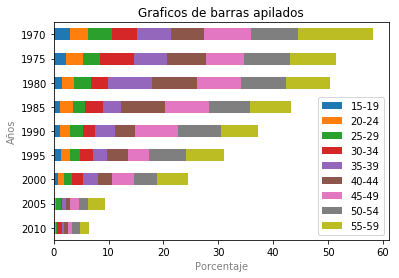

In [20]:
ax = df1.plot.barh(stacked=True)
ax.set_title('Graficos de barras apilados')
ax.set_xlabel('Porcentaje',color='grey')
ax.set_ylabel('Años',color='grey')

## Histogramas

Vamos a trabajar con el [Indice de facilidad para hacer negocios](https://es.wikipedia.org/wiki/%C3%8Dndice_de_facilidad_para_hacer_negocios) en distintos países.


Seleccionamos los paises a utilizar y creamos el dataframe.

In [21]:
paises = [i['id'] for i in wbdata.get_country(incomelevel=['LIC','HIC'])]

# Seleccionamos nuestros nuevos datos
indicadores = {"IC.BUS.EASE.XQ": "indice_negocio", "NY.GDP.PCAP.PP.KD": "PIBPC"} 

data = wbdata.get_dataframe(indicadores, country=paises, convert_date=True)   
df = pd.DataFrame(data=data)

In [22]:
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 80 entries, ('Afghanistan', Timestamp('2019-01-01 00:00:00')) to ('United States', Timestamp('2019-01-01 00:00:00'))
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   indice_negocio  80 non-null     float64
 1   PIBPC           80 non-null     float64
dtypes: float64(2)
memory usage: 2.8+ KB


In [24]:
df.head()

,,indice_negocio,PIBPC
country,date,,
Afghanistan,2019-01-01,173.0,2202.278489
United Arab Emirates,2019-01-01,16.0,67119.132637
Antigua and Barbuda,2019-01-01,113.0,21908.458504
Australia,2019-01-01,14.0,49756.306706
Austria,2019-01-01,27.0,56352.444535


Text(0, 0.5, 'Frecuencia')

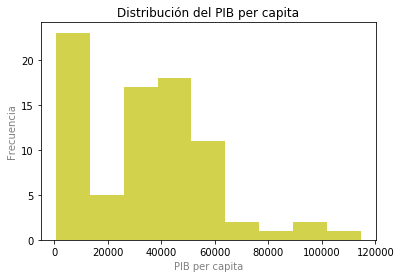

In [25]:
plt.figure()
df['PIBPC'].plot.hist(alpha=0.7,  # Con alpha seteamos la transparencia
                     color='y',
                     bins=9,
                     title='Distribución del PIB per capita')
plt.xlabel('PIB per capita', color='grey')
plt.ylabel('Frecuencia',color='grey')

## Box plot

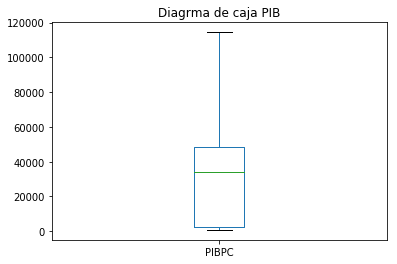

In [26]:
df['PIBPC'].plot.box(title='Diagrma de caja PIB')

Recordamos que dentro de la caja se encuentra el 50% de la población. La línea verde indica la mediana.

## Scatter plot

Hacemos un gráfico de dispersión entre las variables PIB p/ capita e Indice de facilidad p/ hacer negocios.

Text(0, 0.5, 'PIB per capita')

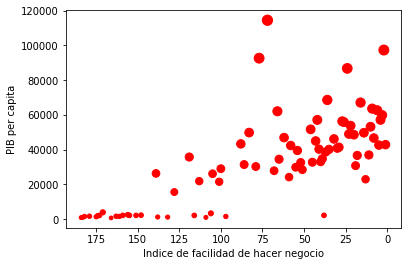

In [27]:
df.plot.scatter(y='PIBPC', x='indice_negocio',
                c='r', 
                s=df['PIBPC']**0.4    # Con s seteamos el tamaño de los puntos
               ) 

plt.gca().invert_xaxis() 
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

Es intuitivo que en los países con más facilidad para los negocios tienen un PIB per capita más alto. 

Finalmente vemos una variante al gráfico de dispersión, un gráfico hexagonal. 

Text(0, 0.5, 'PIB per capita')

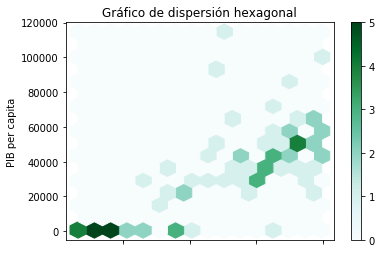

In [28]:
df.plot.hexbin(y='PIBPC', x='indice_negocio', gridsize=15,
              title='Gráfico de dispersión hexagonal')
plt.gca().invert_xaxis()
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

## Ejercicio

Haga un gráfico para ver la evolución de los inscriptos a las distintas instancias educativas, diferenciando pr género, a lo largo del tiempo. Puede ayudarse con la [documentación](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [29]:
indicadores = {'SE.PRM.ENRR.FE':'primario-femenino','SE.PRM.ENRR.MA':'primario-masculino',
               'SE.SEC.ENRR.FE':'secundario-femenino','SE.SEC.ENRR.MA':'segundario-masculino',
               'SE.TER.ENRR.FE':'terciario-femenino','SE.TER.ENRR.MA':'terciario-masculino'}

df = wbdata.get_dataframe(indicadores,country='ARG')

Utilize el período [2000-2017].

In [30]:
# df.iloc...

Una vez que tenga los datos a utilizar realice el gráfico. Pruebe agregarle una leyenda y cambiar el color. Tambíen puede etiquetar los ejes y elegir un título.

In [ ]:
# df.plot...